# Reading .CSV

In [2]:
import pandas as pd

In [ ]:
df = pd.read_excel(r"D:\Sambita\Training\others\BSE\Gathering and pre-processing\Employee data1.xlsx")

In [ ]:
df1 = pd.read_csv(r"D:\Sambita\Training\others\BSE\Gathering and pre-processing\Employee data.csv")

In [ ]:
df

# Reading  .CSV from url

In [ ]:
import requests

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"

response = requests.get(download_url)
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")
df_g=pd.read_csv("nba_all_elo.csv")
type(f)
#z= open(target_csv_path, "wb")
#print("z",type(z))

In [ ]:
car1 = pd.read_csv(r'D:\Sambita\Training\others\BSE\Gathering and pre-processing\car data.csv')
car2 =pd.read_csv(r'D:\Sambita\Training\others\BSE\Gathering and pre-processing\car condition.csv')
car1

In [ ]:
car2= car1.merge(car2,left_on ='car id', right_on='car id')

In [ ]:
car2

In [ ]:
df.info()

In [ ]:
df1.info()

In [ ]:
df['Year']=df["bdate"].dt.year

In [ ]:
import datetime
dt = datetime.datetime(2012, 5, 20)

In [ ]:
import seaborn as sns
sns.boxplot(x=df['salary'])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# multiply and add by random numbers to get some real values
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = random_data.std()
    random_data_mean =random_data.mean()
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(df['salary'])# df.salary

# Irrelevant data handling

In [ ]:
df.dropna()
print(df.drop(axis=1, columns=['salbegin']))
df[df['salary'] <= 57000]


# Missing Value Handling

In [ ]:
print(df.isnull().sum())
print(df[df["prevexp"].isnull()])

In [ ]:
range(len(car2["horsepower"]))

In [ ]:
print(car2.isnull().sum())
for i in range(len(car2["horsepower"])):
    if car2["horsepower"].iloc[i] == "?":
        car2["horsepower"].iloc[i] = np.nan
car2["horsepower"] = pd.to_numeric(car2["horsepower"])
print(car2[car2["horsepower"].isnull()])   

In [ ]:
df['jobcat'].value_counts()

In [ ]:

sns.distplot(df.salary)

In [ ]:
df.describe()

In [ ]:
m=df['salary'].median()
df['salary'].fillna(m,inplace=True)

In [ ]:
car2

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
X= ['jobtime', 'prevexp','minority']
imputer.fit(df[X])
Xtrans = imputer.transform(df[X])
df[X] = Xtrans


In [ ]:
df3= df[df["id"] == 49]
df3

In [ ]:
m1=df['minority'].mode()
df['minority'].fillna(m1, inplace= True)

# Scaling and Transformation

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
count=0
for col, color in zip(['educ', 'jobcat', 'salary', 'salbegin', 'jobtime', 'prevexp'],['r','y','c','m','g','r']):
    count+=1
    if(count==col):
        plt.subplot(1,6)
    else:
        plt.subplot(3,2,count)
    sns.distplot(df[col],label=col,bins=50,  color=color)
    plt.title('{} Distribution'.format(col), fontsize=15)
    plt.legend()
    plt.ylabel('Normed Frequency', fontsize=15)
    plt.xlabel(col, fontsize=15)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [ ]:
#box cox transformation

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
import seaborn as sns
fitted_data, fitted_lambda = stats.boxcox(df.salary)
sns.distplot(df.salary, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
             color ="green", ax = ax[1], label = "Salary")
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
print(fitted_lambda)

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
x = df.select_dtypes(exclude=["object","datetime64[ns]"])
print(x.columns)
x = x [['educ', 'salary', 'salbegin', 'jobtime', 'prevexp',
      ]]
# fit scaler on training data
norm = MinMaxScaler().fit(x)

# transform training data
df[['educ',  'salary', 'salbegin', 'jobtime', 'prevexp',
      ]] = norm.transform(x)

In [ ]:
df

In [ ]:
from sklearn.preprocessing import StandardScaler
# apply standardization on numerical features
num_cols = x.columns
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(x[[i]])
    
    # transform the training data column
    df[i] = scale.transform(x[[i]])
    
    # transform the testing data column
    df[i] = scale.transform(x[[i]])

In [ ]:
plt.figure(figsize=(12,12))
count=0
for col, color in zip(['educ', 'jobcat', 'salary', 'salbegin', 'jobtime', 'prevexp'],['r','y','c','m','g','r']):
    count+=1
    if(count==col):
        plt.subplot(1,6)
    else:
        plt.subplot(3,2,count)
    sns.distplot(df[col],label=col,bins=50,  color=color)
    plt.title('{} Distribution'.format(col), fontsize=15)
    plt.legend()
    plt.ylabel('Normed Frequency', fontsize=15)
    plt.xlabel(col, fontsize=15)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [ ]:
df

# Encoding Categorical data

In [ ]:
data_encoded=pd.get_dummies(data=df.jobcat1)#drop_first=True
df=pd.concat([df,data_encoded],axis=1)

In [ ]:
df

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='error',drop ='first')
jc=enc.fit_transform(df.jobcat1.values.reshape(-1,1)).toarray()

In [ ]:
jc = pd.DataFrame(jc, columns = ['jc1', 'jc2'])

In [ ]:
jc

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
l1= le.fit_transform(df.gender)
l2= pd.DataFrame(l1, columns = ["g1"])

In [ ]:
df2=pd.concat([df,l2],axis=1)

In [ ]:
not_null_con = pd.notnull(car2['Condition'])
lcar=le.fit_transform(car2[not_null_con]['Condition'])
car2=pd.concat([car2,pd.DataFrame(lcar, columns = ["condtn_encode"])],axis=1)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
X= ['horsepower','condtn_encode']
imputer.fit(car2[X])
car2[X] = imputer.transform(car2[X])
car2[X]= car2[X].round()
car2 = car2.rename(columns ={'car id':'car_id'})
print(car2[(car2['car_id']==33) | (car2['car_id']==127 ) ])

print(car2.query('car_id == 393' or 'car_id == 394'))
car2.condtn_encode.value_counts()

In [ ]:
lcar = pd.Categorical(car2[not_null_con]['Condition'])
car2=pd.concat([car2,pd.DataFrame(lcar.codes, columns = ["condtn_encode"])],axis=1)

In [ ]:
#car2['condtn_encode'] = car2['condtn_encode'].astype(str)
car2.info()

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['educ', 'jobcat', 'salary', 'salbegin',
       'jobtime', 'prevexp']].corr(),annot =True,vmax=1,vmin=-1,cmap="coolwarm")
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html --cpolor references

In [ ]:
df2

# Principle component analysis

In [75]:
df = pd.read_excel(r"D:\Sambita\Training\others\BSE\Gathering and pre-processing\Employee data1.xlsx")

df.salary.fillna(df["salary"].median,inplace = True)
df.jobtime.fillna(df["jobtime"].median,inplace = True)
df.prevexp.fillna(df["prevexp"].median,inplace = True)
df.minority.fillna(0,inplace = True)
df.dropna(inplace=True)
df.isnull().sum()


id          0
gender      0
bdate       0
educ        0
jobcat      0
salary      0
salbegin    0
jobtime     0
prevexp     0
minority    0
jobcat1     0
dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
l1= le.fit_transform(df.gender)
l2= pd.DataFrame(l1, columns = ["g1"])
df2=pd.concat([df,l2],axis=1)

In [77]:

data_encoded=pd.get_dummies(data=df2.jobcat1,drop_first=True)
df2=pd.concat([df2,data_encoded],axis=1)

In [78]:
print(df2.info())
df2['jobtime'] = pd.to_numeric(df2['jobtime'], errors='coerce')
df2['prevexp'] = pd.to_numeric(df2['prevexp'], errors='coerce')

df2.dropna(inplace=True)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 473
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   473 non-null    float64       
 1   gender               473 non-null    object        
 2   bdate                473 non-null    datetime64[ns]
 3   educ                 473 non-null    float64       
 4   jobcat               473 non-null    float64       
 5   salary               473 non-null    object        
 6   salbegin             473 non-null    float64       
 7   jobtime              473 non-null    object        
 8   prevexp              473 non-null    object        
 9   minority             473 non-null    float64       
 10  jobcat1              473 non-null    object        
 11  g1                   473 non-null    float64       
 12  Manager              474 non-null    uint8         
 13  Technical Architect  474 non-null  

In [90]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# visualize the PCA scree pot
data = df2[[ 'educ', 'salbegin','jobtime', 'prevexp', 'minority', 'g1','Manager','Technical Architect']]
# var - variance fraction to explain the PCA
# df - pandas dataframe of values fo which PCA is to be computed
# Y - predicted variable
# do_visualize - boolean to show visualization or not
# returns the pca value, the dataframe of PC computed values, the labels for PC and the percentage of variance

def pca_scree(var, df, Y, do_visualize= True):
    
    pca_scl = PCA(var) 
    pca_scl.fit(df)
    princ_comp= pca_scl.transform(df)
    print("Explained variance ratio:: ", pca_scl.explained_variance_ratio_)
    print(" No. of components:: ", abs(pca_scl.n_components_))
    per_var =np.round(pca_scl.explained_variance_ratio_*100, decimals=3)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
    
    pca_df = pd.DataFrame(princ_comp, columns=labels)
    pca_df=pd.concat([pca_df,Y],axis=1)
    
    if do_visualize:
        plt.bar(x= range(1,len(per_var)+1),height= per_var,tick_label = labels)
        plt.ylabel('Percentage of variance')
        plt.xlabel('PCA components')
        plt.title('Scree Plot')
        plt.show()
        
       




Explained variance ratio::  [0.99980118]
 No. of components::  1


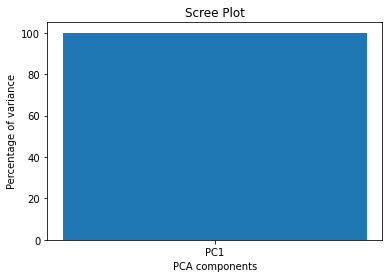

TypeError: cannot unpack non-iterable NoneType object

In [94]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(data,df2["salary"],test_size =0.2)
pca_scl2,pca_df2,labels,per_var = pca_scree(0.90, Xtrain, ytrain)